# Predict the profit of opening a snack bar based on the population of the city  
The data is in ../data/data1.txt, the first column is the population of the city, and the second column is the profit of the snack bar in the city.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

## 1.read data and display

In [2]:
data = pd.read_csv("../Data/data1.txt",header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


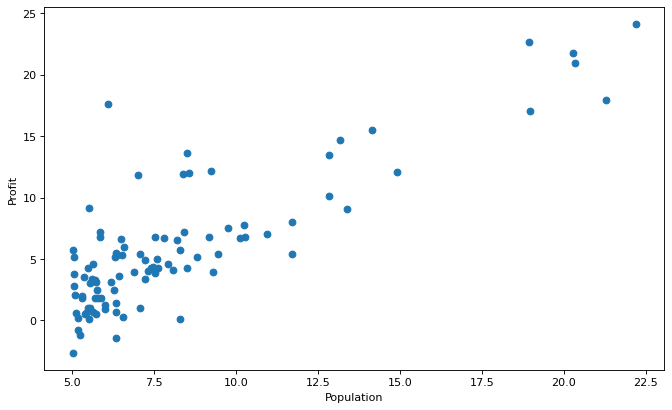

In [3]:
pl=plt.figure(figsize=(10,6),dpi=80)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.scatter(data['Population'],data['Profit'],marker='o')
plt.show()

## 2.Gradient descent implementation

### 2.1 Implement the cost function$J(θ_0,θ_1)$ 
$J(θ_0,θ_1)=\frac{1}{2m}\sum\limits_{i=1}\limits^m(h_θ(x^{(i)})-y^{(i)})^2$ 

In [4]:
"""
X:n-dimensional matrix, input
Y:n-dimensional matrix, output
Theta:n-dimensional matrix,parameter
"""
def ComputeCost(X,Y,Theta):
    SSME=np.power(X*Theta.T-Y,2) #compute square of modeling error
    return np.sum(SSME)/(2*len(X))

### 2.2Implement gradient descent
$repeat ~ until ~ convergence \lbrace$  
$θ_0:=θ_0-\frac{\alpha}{m}\sum\limits_{i=1}\limits^m(h_θ(x^{(i)})-y^{(i)})$  
$θ_1:=θ_1-\frac{\alpha}{m}\sum\limits_{i=1}\limits^m[(h_θ(x^{(i)})-y^{(i)})x^{(i)}]$  
$\rbrace$

In [5]:
"""
X:n-dimensional matrix, input
Y:n-dimensional matrix, output
Theta:n-dimensional matrix,parameter
alpha:learning rate
iters:number of iterations
"""
def GradientDescent(X,Y,Theta,alpha,iters):
    temp=np.mat([0.0,0.0])
    theta_0=[0.0]
    theta_1=[0.0]
    for i in range(iters):
        error = (X*Theta.T-Y)
        for j in range(2):
            term=np.multiply(error,X[:,j])
            temp[0,j]=Theta[0,j]-((alpha/len(X))*np.sum(term))
        Theta=temp
        theta_0.append(Theta[0,0])
        theta_1.append(Theta[0,1])
        cost=ComputeCost(X,Y,Theta)
    return Theta,cost,theta_0,theta_1

### 2.3run forecast

In [6]:
data.insert(0,"new",1)
X=np.mat(data.iloc[:,:-1].values)
Y=np.mat(data.iloc[:,-1].values).T
Theta = np.mat([0,0])
alpha=0.01
iters=1500
parameters,cost,theta_0,theta_1=GradientDescent(X,Y,Theta,alpha,iters)
print("Fitted Curve Parameters:",parameters)
print("cost:",cost)
predict = [1,3.5]*parameters.T
print("predict:",predict)

Fitted Curve Parameters: [[-3.63029144  1.16636235]]
cost: 4.483388256587726
predict: [[0.45197679]]


### Attachment 1: Data Fitting Diagram

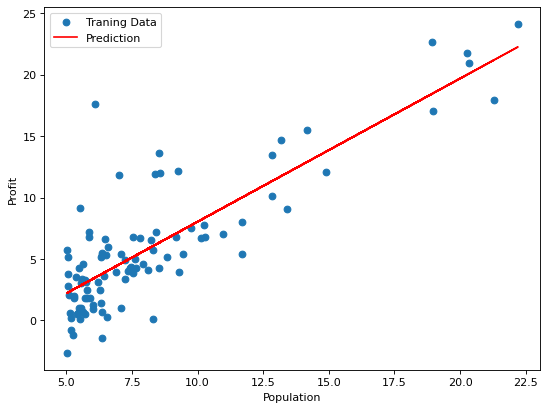

In [7]:
plt.figure(figsize=(8,6),dpi=80)
plt.xlabel("Population")
plt.ylabel("Profit")
plt.scatter(data['Population'],data['Profit'],marker='o',label='Traning Data')
plt.plot(data['Population'],parameters[0, 0] + (parameters[0, 1] * data['Population']),'r',label='Prediction')
plt.legend()
plt.show()

### Attachment 2: Cost Function Diagram

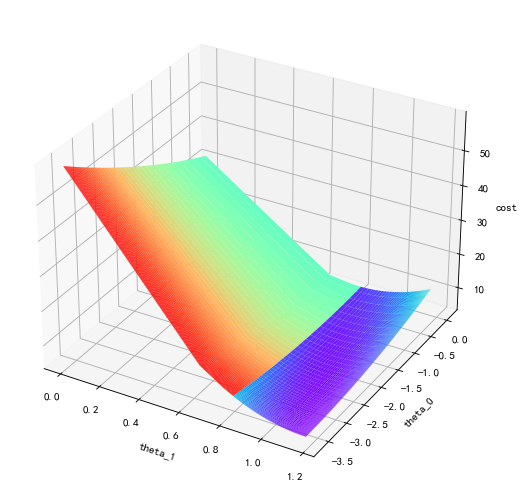

In [165]:
cost_t=np.mat(np.zeros((len(theta_0),len(theta_1))))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        SSME=np.power(X*np.mat([theta_0[i],theta_1[j]]).T-Y,2) #compute square of modeling error
        cost_t[i,j]=np.sum(SSME)/(2*len(X))
theta_1,theta_0=np.meshgrid(theta_1,theta_0)
pl = plt.figure(figsize=(8,6),dpi=80)
ax=Axes3D(pl,auto_add_to_figure=False)
pl.add_axes(ax)
ax.plot_surface(theta_1,theta_0,cost_t,cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_0')
ax.set_zlabel('cost')
plt.show()